In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from analysis import *
from plthelper import *
import matplotlib.pyplot as plt

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [15]:
add_wls = True
detector_scope = "Gen2"

trials = 10000
distance = 10*u.kpc
frequency = 80*u.Hz # 50 Hz and 400 Hz, in steps of 50 Hz
amplitude = 0.2 # 1% and 50% in log steps (1%, 2%, 5%, 10%, 20%, 50%)
time_start = 150*u.ms
time_end = 300*u.ms
position="center"

sim_dt = 1 * u.ms
res_dt = 1 * u.ms

hann_len = 100*u.ms # length of Hann window
hann_res = 5*u.Hz # relates to frequency resolution from hanning, mfft = freq_sam/freq_sam
hann_hop = 20*u.ms # offset by which Hann window is slided over signal
freq_sam = (1/res_dt).to(u.Hz) # = 1/time_res
time_int = True
time_win = [0, 100] * u.s # time independent
freq_win = [50, 1E6] * u.Hz # 

bkg_distr = "lognorm"

temp_para = {"frequency": frequency, 
             "amplitude": amplitude, #in percent of max value
             "time_start": time_start,
             "time_end": time_end,
             "position": position}


stf_para = {"hann_len": hann_len,
             "hann_res": hann_res,
             "hann_hop": hann_hop, 
             "freq_sam": freq_sam,
             "time_int": time_int,
             "time_win": time_win,
             "freq_win": freq_win}


model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 27*u.Msun, 
             'eos': 'LS220'}
        }

sim = Simulation(model=model,
                 distance=10* u.kpc, 
                 res_dt=res_dt,
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.000*u.s, tmax=1.000*u.s, dt=sim_dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 detector_scope = detector_scope,
                 add_wls = add_wls)
sim.run()

In [32]:
# Initialize analysis class and run analysis
ana = Analysis(sim, res_dt = res_dt, distance=distance, trials = trials, temp_para=temp_para)
ana.run(mode = "STF", ft_para = stf_para, distribution = bkg_distr, model = "generic", smoothing=True)

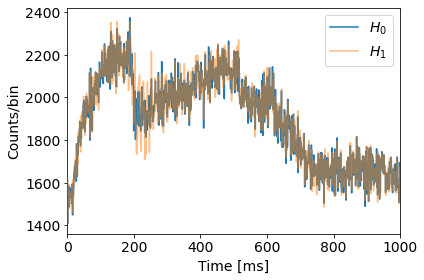

In [33]:
plot_hits(ana.sim.time, ana._comb)

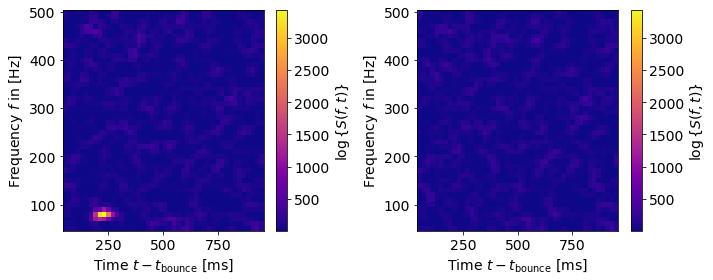

In [34]:
plot_stft(ana._time_new, ana._freq_new, ana._stf)

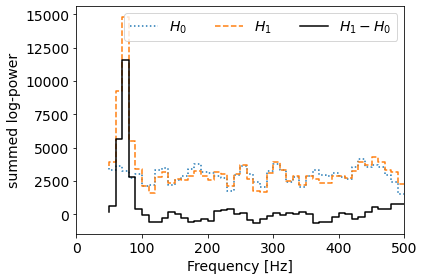

In [35]:
if time_int:
    plot_stft_time_int(ana._freq_new, ana._stf_tint)

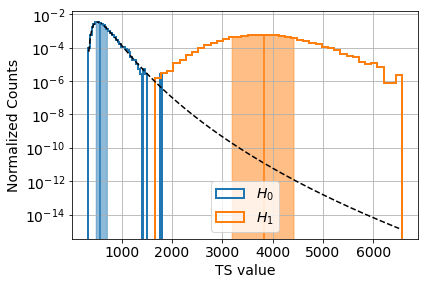

In [36]:
plot_ts(ana.ts, bkg_distr="lognorm")
plt.yscale("log")

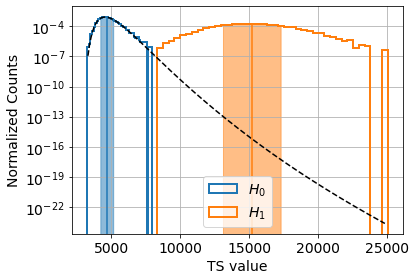

In [37]:
if time_int:
    plot_ts(ana.ts_tint, bkg_distr="lognorm")
    plt.yscale("log")

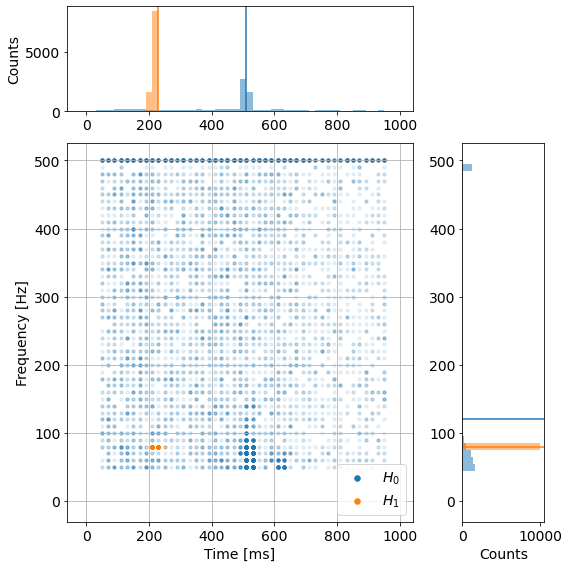

In [38]:
plot_fit_time_freq(ana.ffit, ana.tfit)

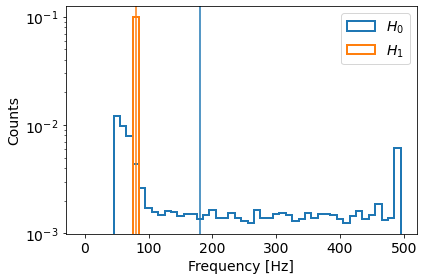

In [39]:
if time_int:
    plot_fit_freq(ana.ffit_tint)

In [40]:
dist_range = np.arange(5,35,5) * u.kpc
Zscore, Ts_stat = ana.dist_scan(dist_range, mode = "STF", ft_para = stf_para, distribution=bkg_distr, model = "generic", verbose = "debug")

Distance: 5.0 kpc
Distance: 10.0 kpc
Distance: 15.0 kpc
Distance: 20.0 kpc
Distance: 25.0 kpc
Distance: 30.0 kpc


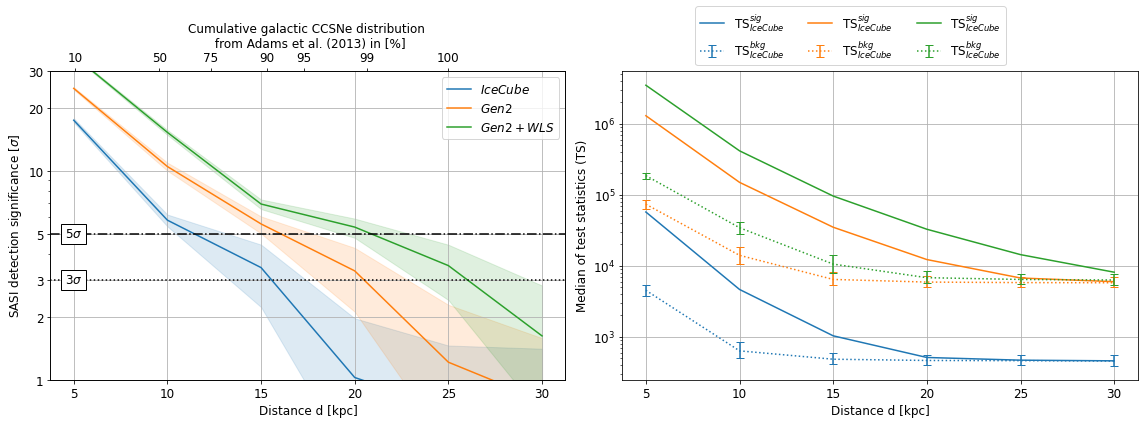

In [31]:
plot_significance(dist_range, Zscore, Ts_stat) # NO signal smooting

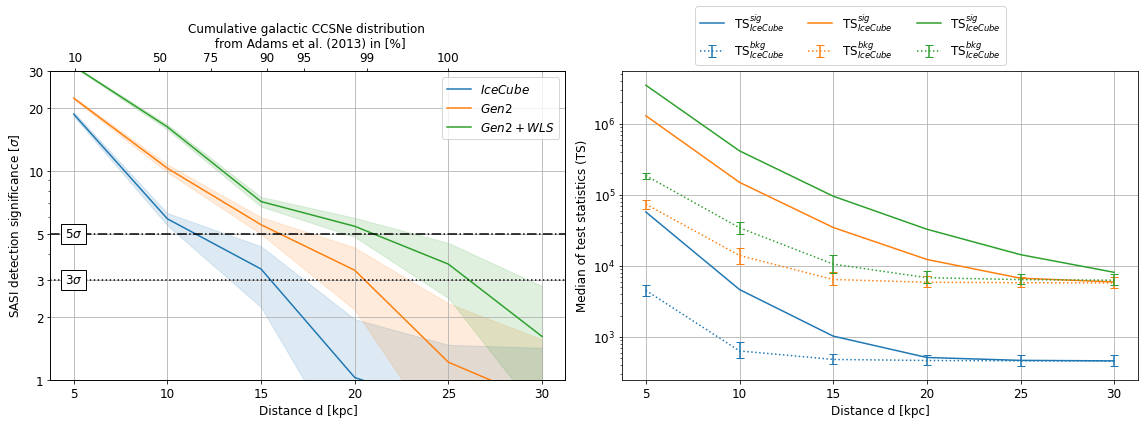

In [41]:
plot_significance(dist_range, Zscore, Ts_stat) #100Hz signal smooting

In [13]:
#TODO
#-experiment with frequency cuts
#-smoothen the null hypo light curve
#-why is there excees power at high frequencies?
#-How many steps should we use? 5, 10 as many as possible? And what is the effect? Run 100 trials or so and see of much the interpolation changes if we go from 5 to 10 to all available